In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

figsize = (14, 3.5)

# Exercise: Seoul Bike Sharing

## Context

<center>
<img src="assets/bike_sharing.jpg" width=60%/>    
</center>

Let's consider the problem of estimating demand for a bike sharing service. In particular, based on easy-to-obtain information (e.g. weather forecasts), we wish to predict the number of requested bikes, so that more informed allocation decisions can be made. 

## Datset 

We will use the [Seoul bike-sharing dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from the [UCI repository](https://archive.ics.uci.edu/ml/datasets.php), which contains historical data about demand for a bike sharing service in Seoul, together with a number of correlates.

Overall, the dataset is in tabular form and features the following columns:

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature - Temperature in Celsius degrees
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - in Celsius degrees
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Our target (i.e. the quantity we want to predict) will be "Rented Bike count"

Let's proceed to load the data:

In [2]:
import pandas as pd
import os

fname = os.path.join('data', 'SeoulBikeData.csv')
data = pd.read_csv(fname, sep=',')
data.head()

,Date,Rented Bike Count,Hour,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In this exercise, we will restrict our attention to _numerical attributes_:

In [3]:
num_input = ['Hour', 'Temperature(^C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(^C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
output = 'Rented Bike Count'

data_num = data[num_input + [output]]
data_num.head()

,Hour,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78


## Dataset Inspection

Next, it's a good idea to perform some dataset inspection.

First, let's obtain basic statistics for each column:

In [4]:
data_num.describe()

,Hour,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,704.602055
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,644.997468
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,191.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,504.500000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1065.250000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3556.000000


Then try to build the histogram for each input attribute (they are in the `num_input` variable):

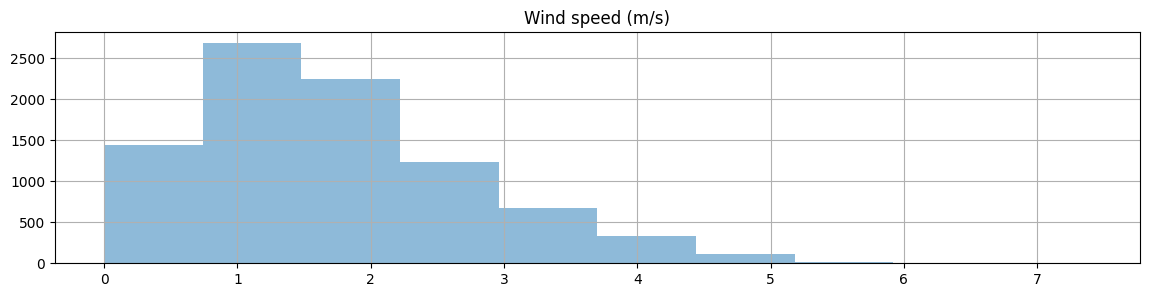

In [5]:
# An example here
data_num.hist(column='Wind speed (m/s)', alpha=0.5, figsize=(14, 3), bins=None);

...And try to build a scatter plot (or box plot) for each input attribute w.r.t. the target:

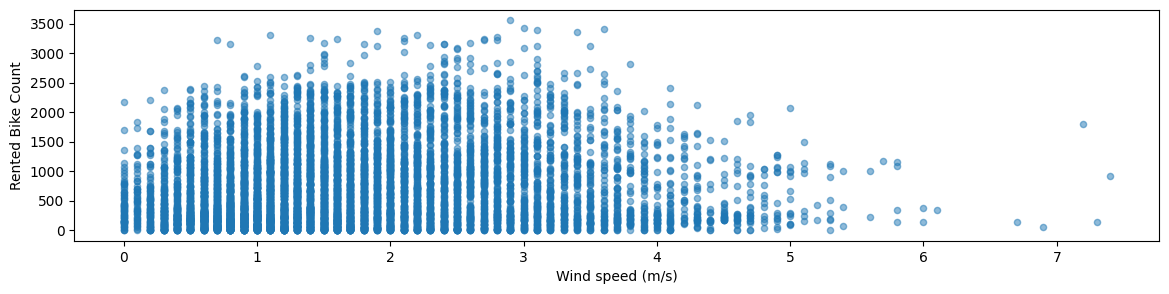

In [7]:
# An example here
data_num.plot.scatter(x='Wind speed (m/s)', y=output, alpha=0.5, figsize=(14, 3));

## Train-Test Splitting

Then we split the data into an input and output `DataFrame`:

In [6]:
X = data_num[num_input]
y = data_num[[output]] # We use a list, so we obtain a DataFrame
display(X)
display(y)

,Hour,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


...And into a training and test set:

In [7]:
from sklearn.model_selection import train_test_split

test_set_fraction = .34
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=test_set_fraction, random_state=42)

print(f"Number of training examples: {len(X_tr)}")
print(f"Number of test examples: {len(X_ts)}")

Number of training examples: 5781
Number of test examples: 2979


Now, based on the code from the previous lecture, try to:

* Build a linear regression model
* Train it on `X_tr`, `y_tr`
* Display the value of the $R^2$ coefficient for both the training and the test set

Some open questions:

* What happens if you remove the `Hour` attribute?
* What happens with different proportions of training/test data?